In [1]:
#import library penting
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

%matplotlib inline

In [2]:
#load dataset
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
#cek jumlah data dan kolomnya
data.shape

(768, 9)

## Step EDA

In [4]:
#cek data kosong
data.isnull().values.any()

False

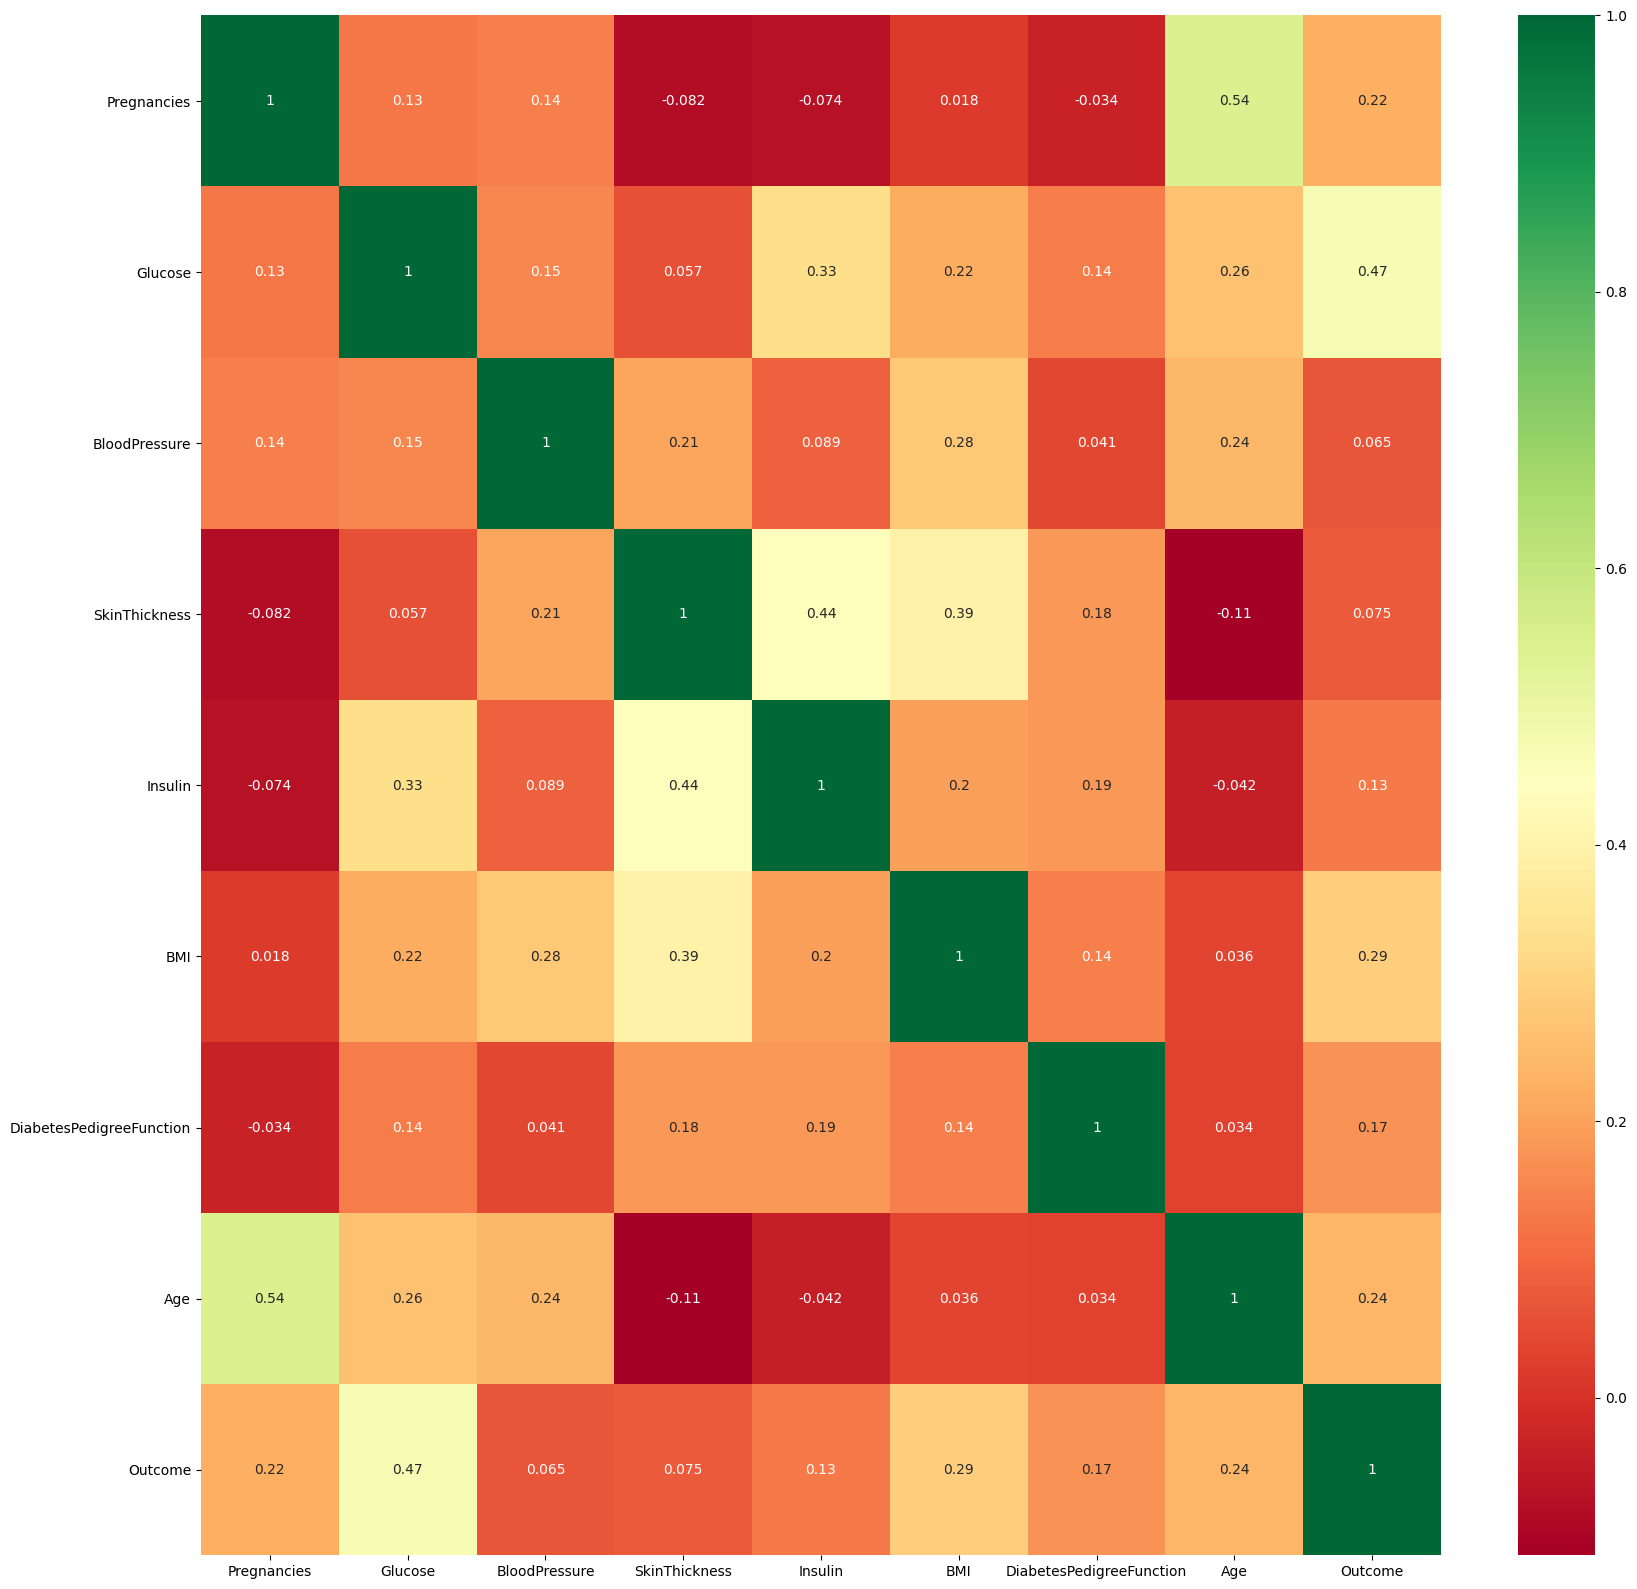

In [5]:
#Korelasi menggunakan heatmap
import seaborn as sns 

korelasi = data.corr()
features = korelasi.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(data[features].corr(),annot=True,cmap="RdYlGn")


In [6]:
#Show corellation in tables
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [7]:
#statistika dasar
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
#checking skewness dari data
diabetes_true_count =len(data.loc[data['Outcome']==1])
diabetes_false_count = len(data.loc[data['Outcome']==0])

In [9]:
#view
(diabetes_true_count,diabetes_false_count)

(268, 500)

In [10]:
#Missing value
print('total number of rows : {0}'.format(data.shape[0]))
print('total number of columns : {0}'.format(data.shape[1]))

total number of rows : 768
total number of columns : 9


In [11]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
print('Banyak baris nilai nol untuk pregnancies :{0}'.format(len(data.loc[data['Pregnancies']==0])))
print('Banyak baris nilai nol untuk glukosa :{0}'.format(len(data.loc[data['Glucose']==0])))
print('Banyak baris nilai nol untuk tekanan darah :{0}'.format(len(data.loc[data['BloodPressure']==0])))
print('Banyak baris nilai nol untuk ketebalan kulit :{0}'.format(len(data.loc[data['SkinThickness']==0])))
print('Banyak baris nilai nol untuk ketebalan insulin :{0}'.format(len(data.loc[data['Insulin']==0])))
print('Banyak baris nilai nol untuk ketebalan BMI :{0}'.format(len(data.loc[data['BMI']==0])))
print('Banyak baris nilai nol untuk ketebalan DiabetesPedigree :{0}'.format(len(data.loc[data['DiabetesPedigreeFunction']==0])))
print('Banyak baris nilai nol untuk ketebalan Usia :{0}'.format(len(data.loc[data['Age']==0])))

Banyak baris nilai nol untuk pregnancies :111
Banyak baris nilai nol untuk glukosa :5
Banyak baris nilai nol untuk tekanan darah :35
Banyak baris nilai nol untuk ketebalan kulit :227
Banyak baris nilai nol untuk ketebalan insulin :374
Banyak baris nilai nol untuk ketebalan BMI :11
Banyak baris nilai nol untuk ketebalan DiabetesPedigree :0
Banyak baris nilai nol untuk ketebalan Usia :0


In [13]:
data2 = data.copy()

In [14]:
#rata-rata
avg_glucosa = data2['Glucose'].mean()
avg_blood = data2['BloodPressure'].mean()
avg_thickness = data2['SkinThickness'].mean()
avg_insulin = data2['Insulin'].mean()
avg_bmi = data2['BMI'].mean()

In [15]:
#now replace avg to columns 
data2['Glucose'].replace({0:avg_glucosa},inplace=True)
data2['BloodPressure'].replace({0:avg_blood},inplace=True)
data2['SkinThickness'].replace({0:avg_thickness},inplace=True)
data2['Insulin'].replace({0:avg_insulin},inplace=True)
data2['BMI'].replace({0:avg_bmi},inplace=True)


In [16]:
#double check
print('Banyak baris nilai nol untuk pregnancies :{0}'.format(len(data2.loc[data2['Pregnancies']==0])))
print('Banyak baris nilai nol untuk glukosa :{0}'.format(len(data2.loc[data2['Glucose']==0])))
print('Banyak baris nilai nol untuk tekanan darah :{0}'.format(len(data2.loc[data2['BloodPressure']==0])))
print('Banyak baris nilai nol untuk ketebalan kulit :{0}'.format(len(data2.loc[data2['SkinThickness']==0])))
print('Banyak baris nilai nol untuk ketebalan insulin :{0}'.format(len(data2.loc[data2['Insulin']==0])))
print('Banyak baris nilai nol untuk ketebalan BMI :{0}'.format(len(data2.loc[data2['BMI']==0])))
print('Banyak baris nilai nol untuk ketebalan DiabetesPedigree :{0}'.format(len(data2.loc[data2['DiabetesPedigreeFunction']==0])))
print('Banyak baris nilai nol untuk ketebalan Usia :{0}'.format(len(data2.loc[data2['Age']==0])))

Banyak baris nilai nol untuk pregnancies :111
Banyak baris nilai nol untuk glukosa :0
Banyak baris nilai nol untuk tekanan darah :0
Banyak baris nilai nol untuk ketebalan kulit :0
Banyak baris nilai nol untuk ketebalan insulin :0
Banyak baris nilai nol untuk ketebalan BMI :0
Banyak baris nilai nol untuk ketebalan DiabetesPedigree :0
Banyak baris nilai nol untuk ketebalan Usia :0


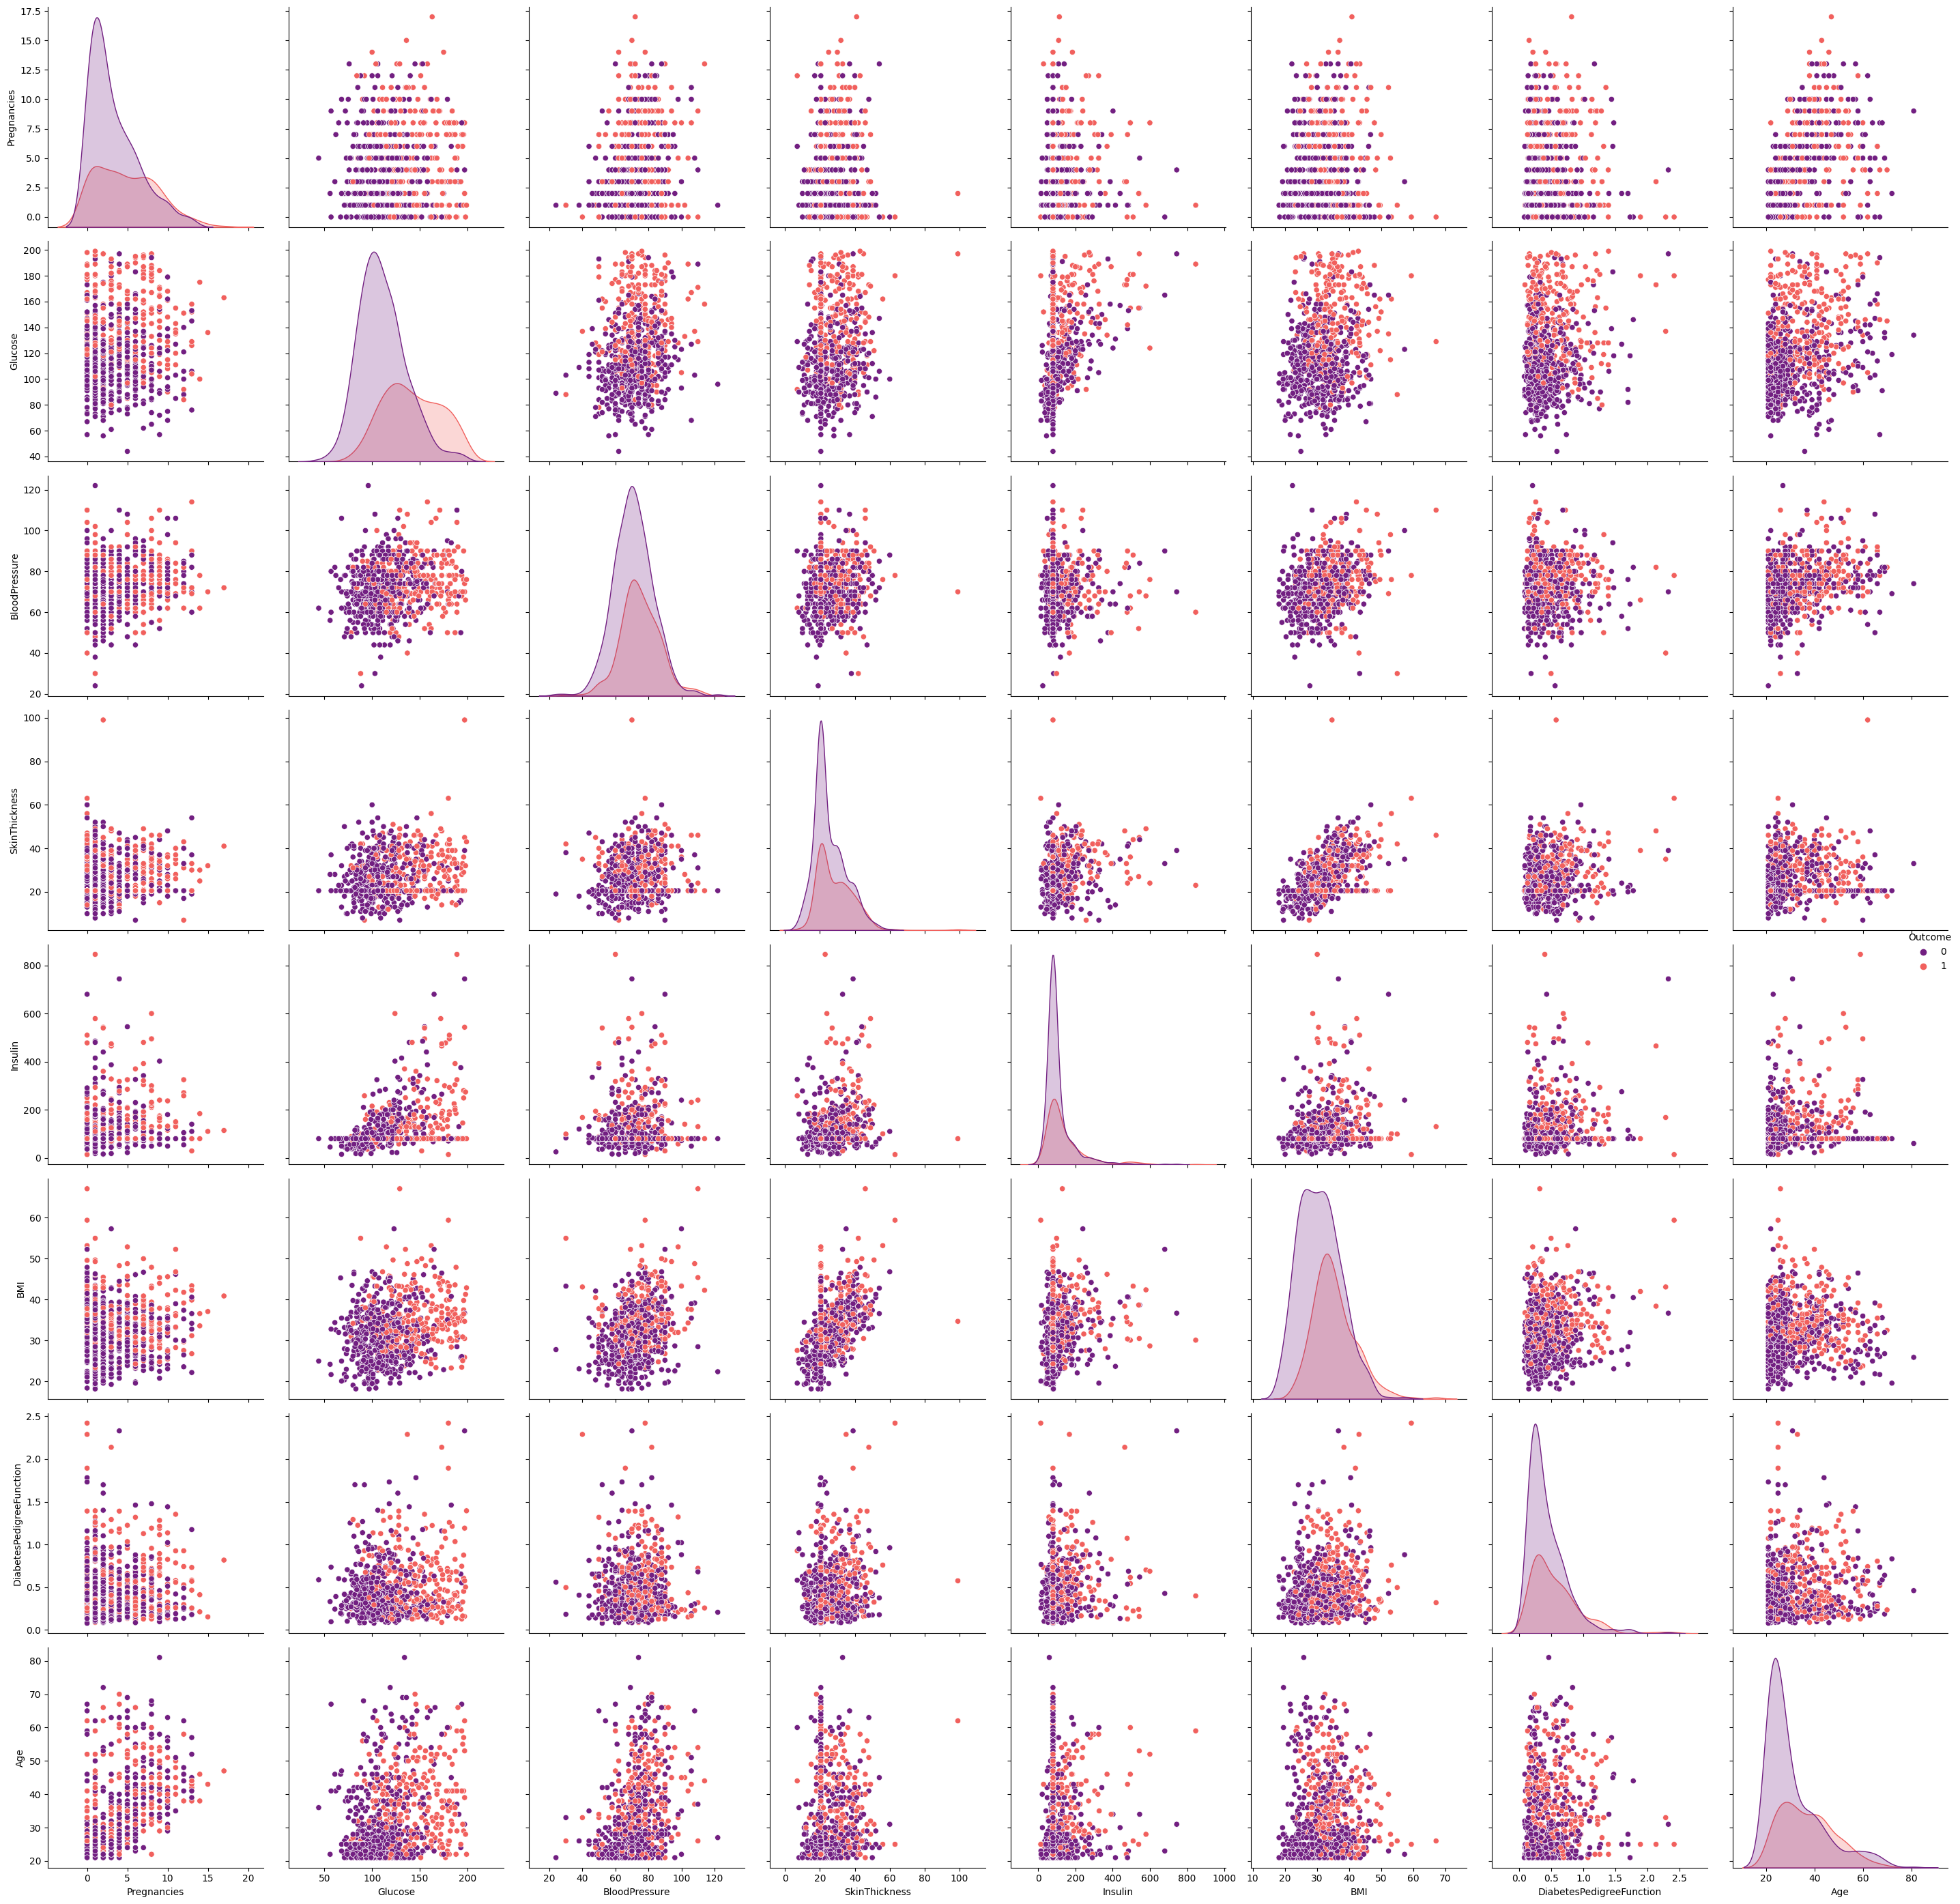

In [17]:
#make pairplot
sns.pairplot(data2,hue='Outcome',palette='magma',height=3.5)
plt.tight_layout()

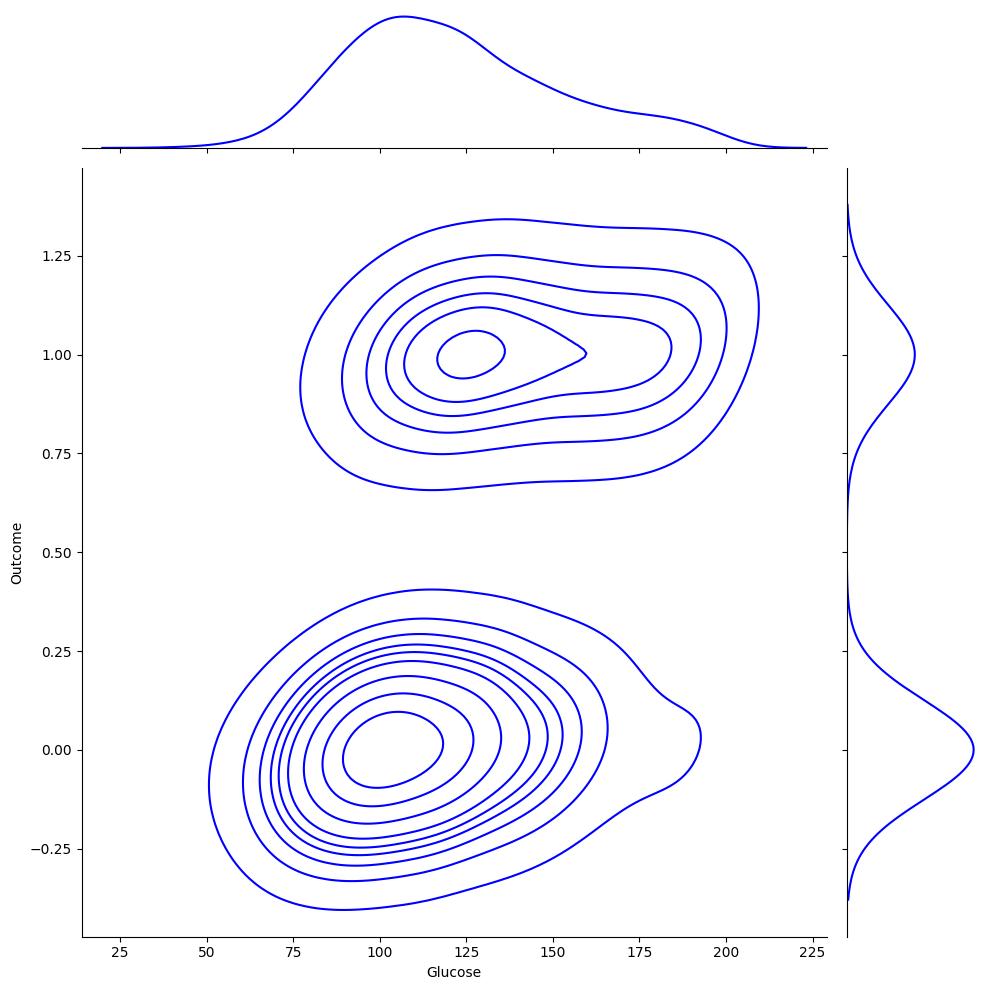

In [18]:
#joinplot
sns.jointplot(x='Glucose',y='Outcome',data=data2,height=10,kind='kde',color='blue')
plt.tight_layout()

## Apply Model

In [19]:
from sklearn.model_selection import train_test_split

X = data2.drop('Outcome',axis=1)
y = data2['Outcome']

In [20]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [21]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [23]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84.0,69.105469,20.536458,79.799479,31.992578,0.304,21
618,9,112.0,82.000000,24.000000,79.799479,28.200000,1.282,50
346,1,139.0,46.000000,19.000000,83.000000,28.700000,0.654,22
294,0,161.0,50.000000,20.536458,79.799479,21.900000,0.254,65
231,6,134.0,80.000000,37.000000,370.000000,46.200000,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139.0,64.000000,35.000000,140.000000,28.600000,0.411,26
106,1,96.0,122.000000,20.536458,79.799479,22.400000,0.207,27
270,10,101.0,86.000000,37.000000,79.799479,45.600000,1.136,38
435,0,141.0,69.105469,20.536458,79.799479,42.400000,0.205,29


In [24]:
X_train.shape

(614, 8)

In [25]:
y_train.shape

(614,)

In [26]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98.0,58.0,33.000000,190.000000,34.0,0.430,43
324,2,112.0,75.0,32.000000,79.799479,35.7,0.148,21
624,2,108.0,64.0,20.536458,79.799479,30.8,0.158,21
690,8,107.0,80.0,20.536458,79.799479,24.6,0.856,34
473,7,136.0,90.0,20.536458,79.799479,29.9,0.210,50
...,...,...,...,...,...,...,...,...
355,9,165.0,88.0,20.536458,79.799479,30.4,0.302,49
534,1,77.0,56.0,30.000000,56.000000,33.3,1.251,24
344,8,95.0,72.0,20.536458,79.799479,36.8,0.485,57
296,2,146.0,70.0,38.000000,360.000000,28.0,0.337,29


In [32]:
y_train

60     0
618    1
346    0
294    0
231    1
      ..
71     0
106    0
270    1
435    1
102    0
Name: Outcome, Length: 614, dtype: int64

## Training

In [33]:
from sklearn.svm import SVC

SVC_model = SVC()

In [34]:
SVC_model.fit(X_train,y_train)

SVC()

In [35]:
svc_prediction = SVC_model.predict(X_test)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,svc_prediction))

[[87 12]
 [24 31]]


In [37]:
print(classification_report(y_test,svc_prediction))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        99
           1       0.72      0.56      0.63        55

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154



## Save Model

In [38]:
import pickle

pickle.dump(SVC_model,open('SVC.pkl','wb'))